<a href="https://www.kaggle.com/code/moazeldsokyx/news-classification-with-svc-clearly-explained?scriptVersionId=155248629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Upgrade seaborn to the latest version
!pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.
ydata-profiling 4.3.1 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.0 which is incompatible.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # Import Seaborn for improved styling
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbc-news/bbc-text.csv


In [3]:
df = pd.read_csv(r'/kaggle/input/bbc-news/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
categories = df['category'].unique()
categories

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

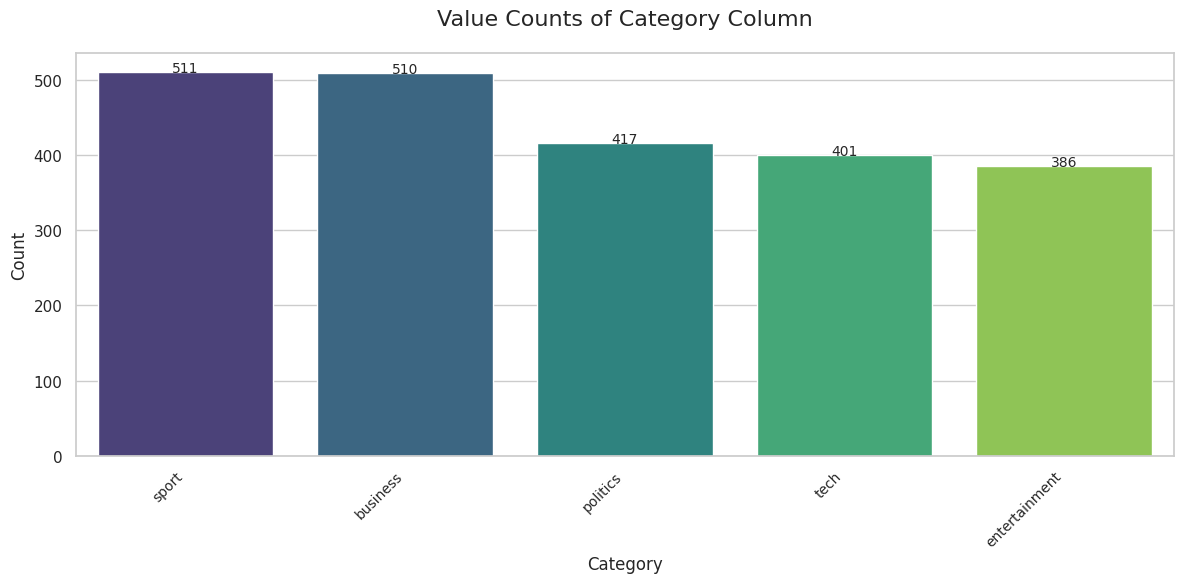

In [6]:
# Calculate value counts
value_counts = df['category'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot with Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=value_counts.index, legend=False)
ax.set_title('Value Counts of Category Column', fontsize=16, pad=20)  # Add title with larger font size and padding
ax.set_xlabel('Category', fontsize=12)  # Customize x-axis label
ax.set_ylabel('Count', fontsize=12)  # Customize y-axis label

# Rotate x-axis tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


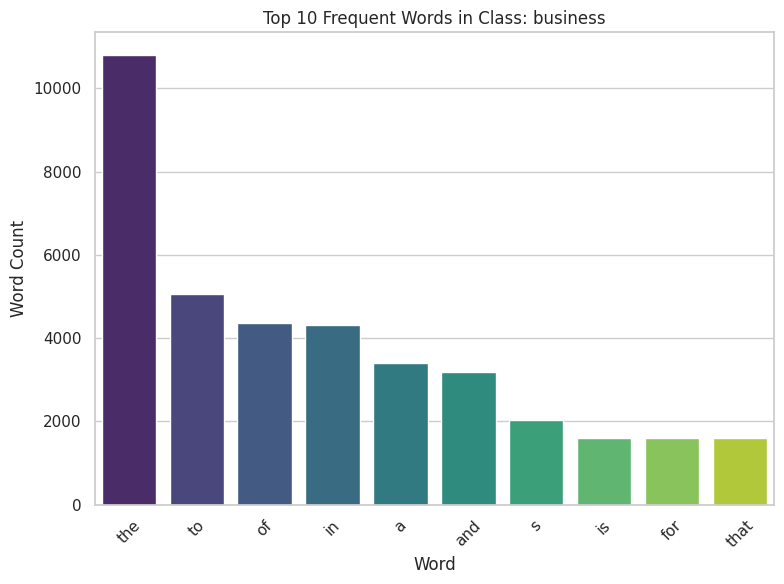

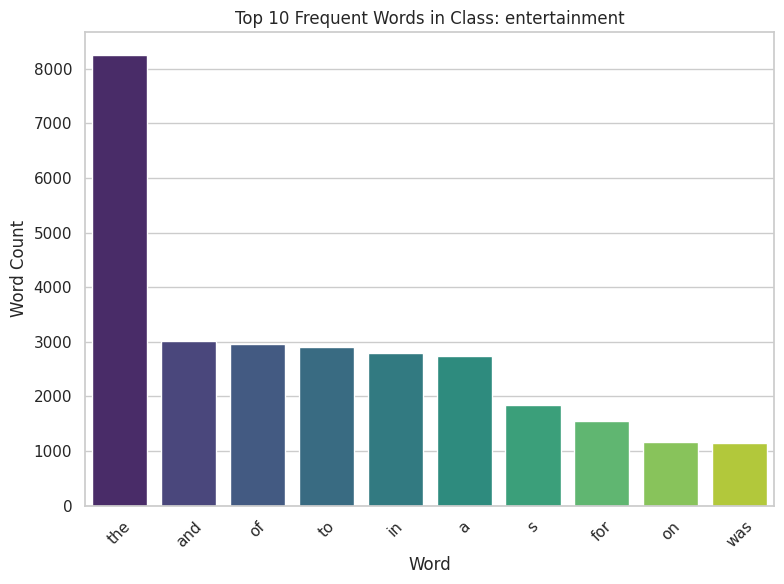

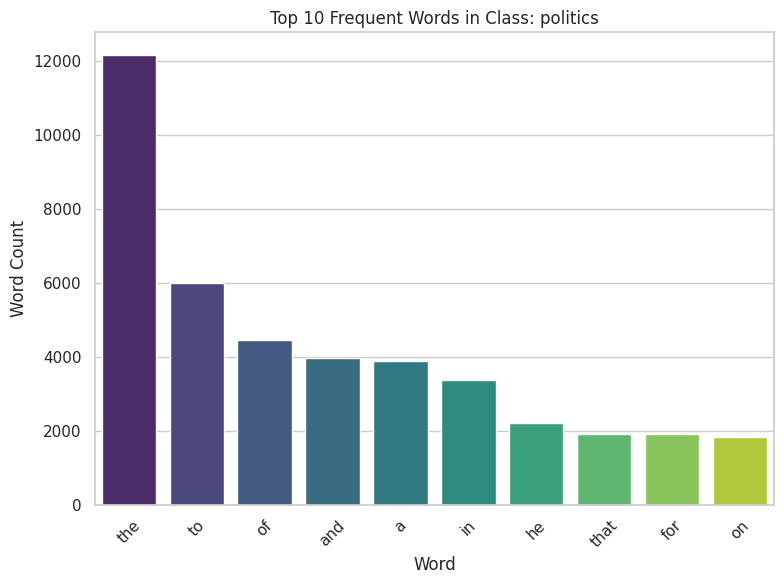

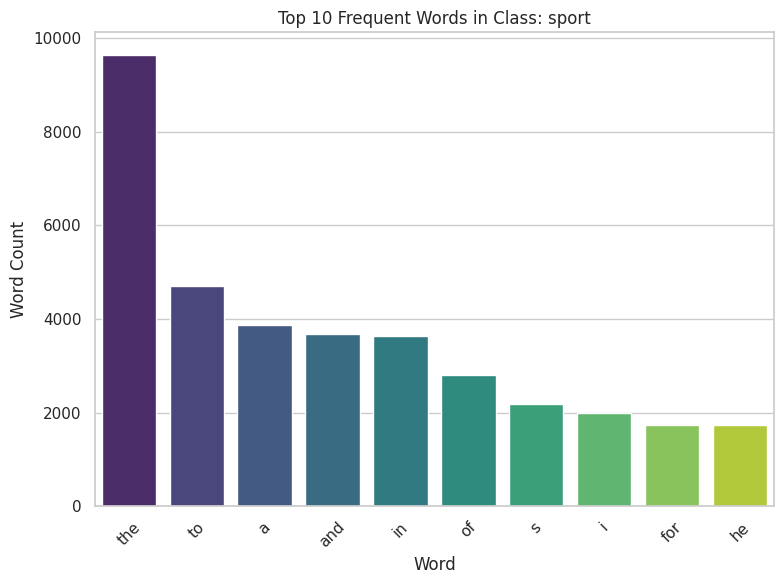

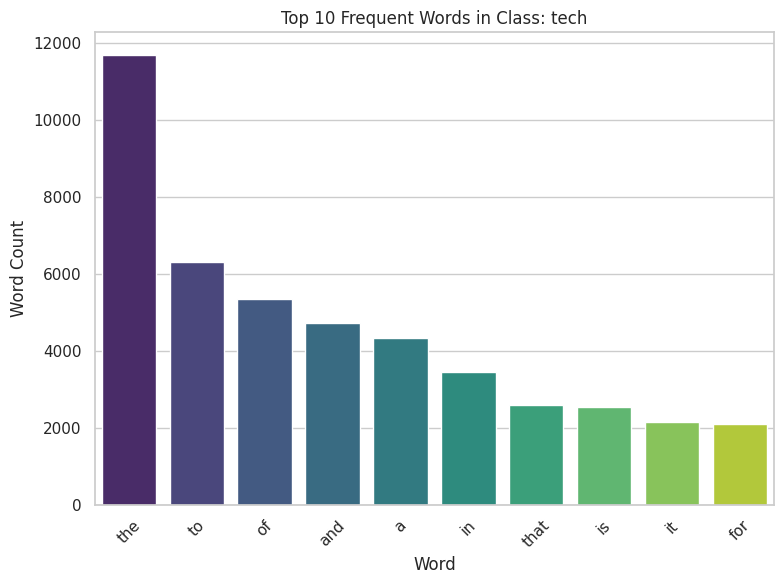

In [7]:

def get_top_words_by_class(df, text_column_name):
    # Create a dictionary to store the top 10 frequent words for each class
    top_words_by_class = {}

    # Group the DataFrame by 'category' column
    grouped = df.groupby('category')

    # Iterate through each group (class)
    for category, group_df in grouped:
        # Concatenate all text within the class
        text = ' '.join(group_df[text_column_name])

        # Tokenize the text (split it into words)
        words = text.split()

        # Count the frequency of each word within the class
        word_counts = Counter(words)

        # Get the top 10 frequent words for the class
        top_words = dict(word_counts.most_common(10))

        # Store the top words in the dictionary
        top_words_by_class[category] = top_words

    # Plot the top 10 frequent words for each class in separate figures
    for category, top_words in top_words_by_class.items():
        # Convert the dictionary to a DataFrame for plotting
        top_words_df = pd.DataFrame({'Word': list(top_words.keys()), 'Count': list(top_words.values())})

        # Create a new figure for each class
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(x='Word', y='Count', data=top_words_df, palette='viridis', hue='Word', legend=False)

        plt.title(f'Top 10 Frequent Words in Class: {category}')
        plt.xlabel('Word')
        plt.ylabel('Word Count')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# Usage
get_top_words_by_class(df, 'text')


# Note on Top 10 Frequent Words in Each Class

In natural language processing (NLP) and text analysis, we often encounter common words known as "stopwords." These words are extremely frequent but typically carry little to no meaningful information. Think of words like "the," "an," "a," "in," and "with" – they're important for sentence structure but don't add much to the content's meaning.

So, why is this important? Well, here are a few key takeaways:

1. **Reducing Noise:** Stopwords can introduce noise into our analysis. Removing them helps clean up the data and ensures we're focusing on the words that truly matter.

2. **Enhancing Efficiency:** By getting rid of these high-frequency but uninformative words, we can speed up our text processing tasks.

3. **Highlighting Significance:** After removing stopwords, the remaining words are often more meaningful. This can greatly improve the quality of our analyses, whether we're doing sentiment analysis, topic modeling, or text classification.

In our recent analysis, we noticed that the top 10 frequent words in each class are very likely to be stopwords. So, as we move forward with our NLP tasks, it's a smart move to include a preprocessing step where we remove these top frequent words from our text data.

By doing this, we can make our NLP models more accurate and effective and uncover more valuable insights from our text data. So, keep this in mind as we continue with our analysis – it's a small but crucial step toward better results! 😊📊📚


# Now, Let's Preprocess the Data

With a clear understanding of the importance of handling stopwords and other preprocessing steps in mind, it's time to take action. In this section, we'll delve into the data preprocessing tasks that will help us clean and prepare our text data for further analysis.

Let's get started by implementing the necessary data preprocessing steps to ensure our text data is in optimal condition for our upcoming analyses.


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources (stopwords) if you haven't already.
nltk.download('stopwords')

# Load NLTK stopwords and create a set of punctuation characters.
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess text: lowercase, remove stopwords, punctuation.
def preprocess_text(text):
    # Lowercase the text.
    text = text.lower()
    
    # Tokenize the text.
    words = word_tokenize(text)
    
    # Remove stopwords, punctuation.
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    
    # Join the filtered and words back into a single string.
    return ' '.join(filtered_words)

# Apply the preprocess_text function to the 'text' column.
df['text_processed'] = df['text'].apply(preprocess_text)

# Display the DataFrame with processed text.
df


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,political squabbles snowball become commonplac...


## Understanding Data Preprocessing

In this code snippet, we are performing data preprocessing tasks to prepare our text data for analysis. Data preprocessing is a crucial step in natural language processing (NLP) and text analysis to clean and structure the text data effectively.

### Importing Libraries

We start by importing the necessary libraries:

- `nltk`: The Natural Language Toolkit library, which provides various tools for working with human language data.
- `stopwords`: A module within NLTK that contains a list of common stopwords (words that don't carry significant meaning).
- `word_tokenize`: A function from NLTK used to split text into individual words.
- `string`: Python's built-in string library, which we use to handle punctuation.

### Downloading NLTK Resources

Before using NLTK stopwords, we need to download them using `nltk.download('stopwords')`. Stopwords are common words like "the," "and," "is," etc., which are typically removed during preprocessing because they don't provide valuable information.

### Initializing Preprocessing Components

We initialize several components for preprocessing:

- `stop_words`: A set containing English stopwords from NLTK.
- `punctuation`: A set containing punctuation characters, which we'll remove from the text.

### Preprocessing Function

The heart of the preprocessing is the `preprocess_text` function. Here's what it does:

1. Converts text to lowercase to ensure uniformity in text casing.
2. Tokenizes the text into individual words using `word_tokenize`.
3. Removes stopwords and punctuation characters.
5. Joins the filtered and words back into a single string.

### Applying Preprocessing

We then apply the `preprocess_text` function to each text entry in the 'text' column of our DataFrame (`df`). The processed text is stored in a new column named 'text_processed.'

### Displaying Processed Data

Finally, we display the DataFrame (`df`) with the newly processed text data. This step allows us to visually inspect the impact of preprocessing on our text data, which is now in a cleaner and more suitable format for various NLP tasks.

By following these preprocessing steps, we ensure that our text data is ready for tasks like sentiment analysis, topic modeling, or text classification, where meaningful content is of utmost importance.


# Now Let's see the top 10 frequent words for each class after preprocessing


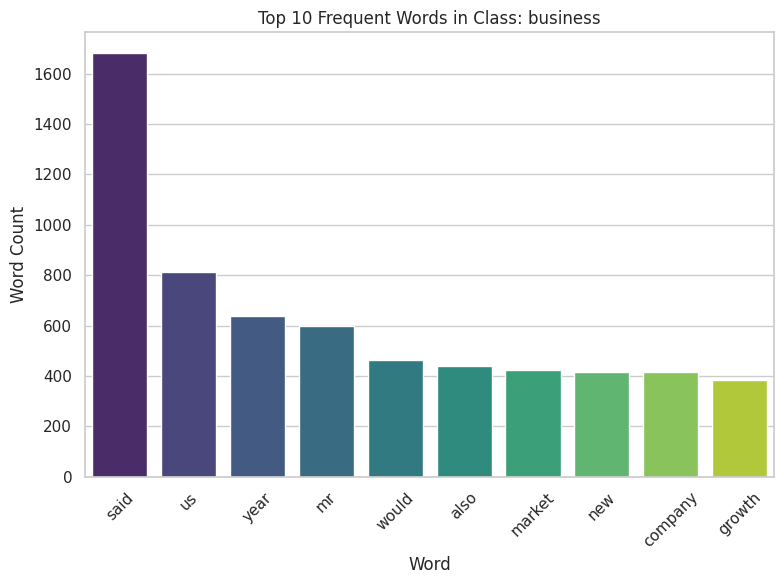

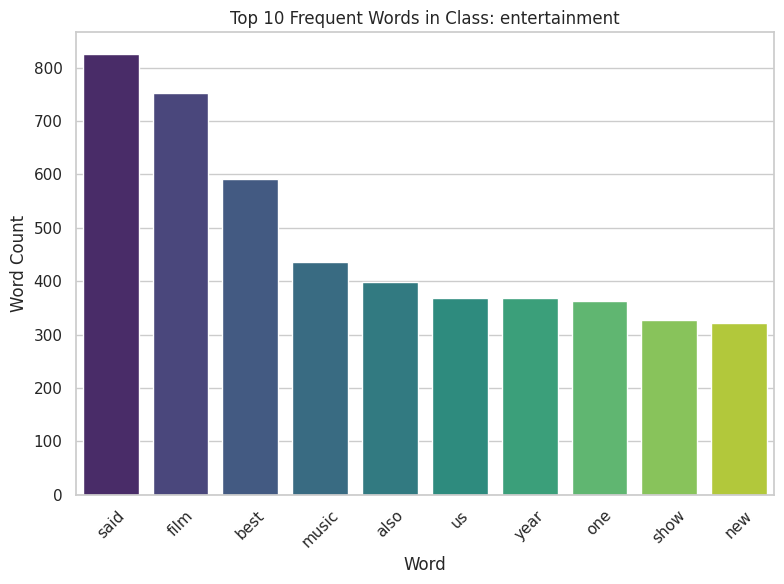

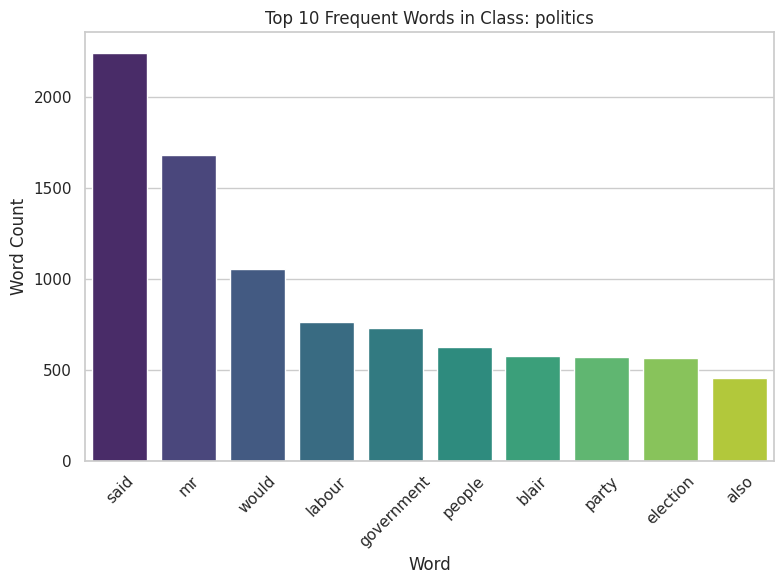

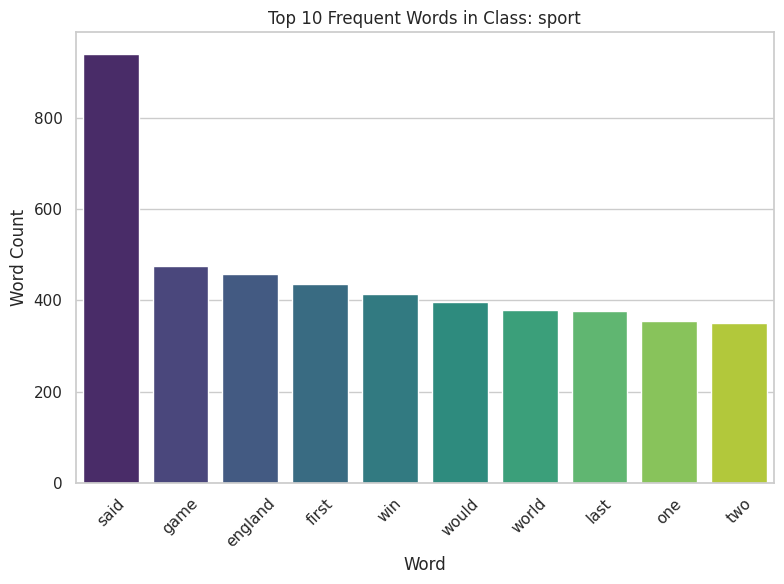

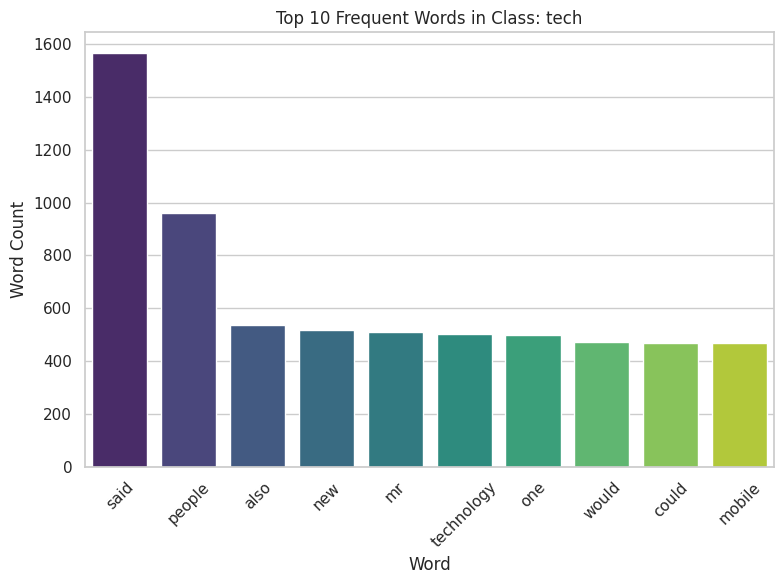

In [9]:
get_top_words_by_class(df,'text_processed')

# Create and display a word cloud for each class

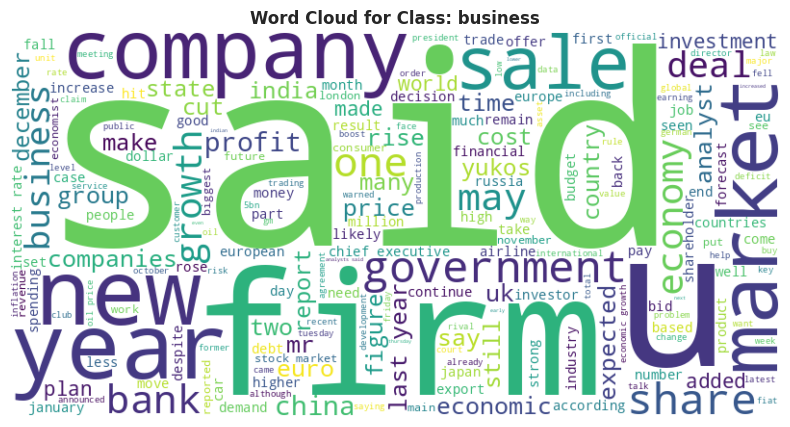

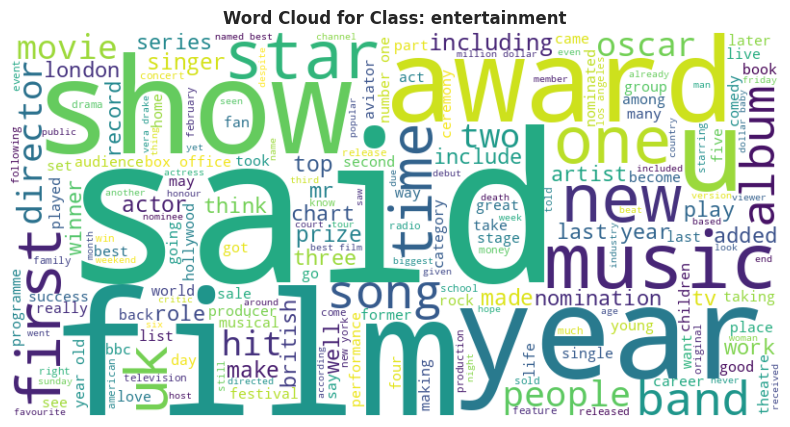

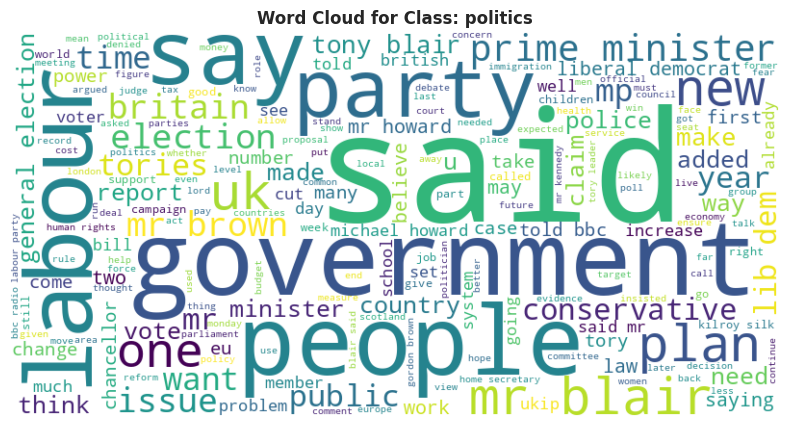

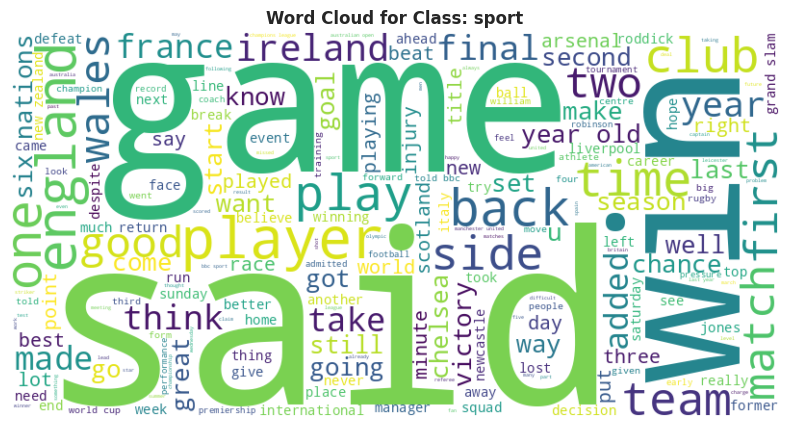

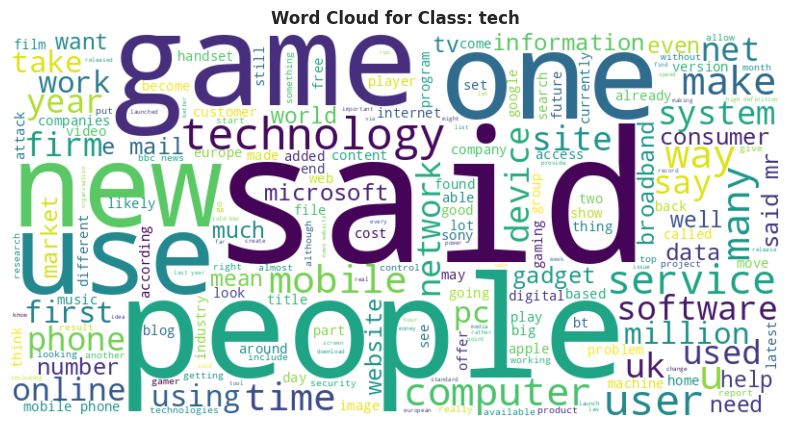

In [10]:
from wordcloud import WordCloud

# Create a word cloud for each class
def create_word_clouds(df, text_column_name):
    # Group the DataFrame by 'category' column
    grouped = df.groupby('category')

    # Iterate through each group (class)
    for category, group_df in grouped:
        # Concatenate all text within the class
        text = ' '.join(group_df[text_column_name])

        # Generate a word cloud for the class
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Display the word cloud for the class
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Class: {category}', fontweight='bold')
        plt.axis('off')  # Turn off axis labels
        plt.show()

create_word_clouds(df, 'text_processed')  # Use 'text_processed' column if you've preprocessed the text


#  Label Encoding
Now apply label encoding to the 'category' column using the fit_transform method. This step replaces the original category names with unique numerical values and stores the result back in the 'category' column.

In [11]:
df

,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,political squabbles snowball become commonplac...


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
class_names = label_encoder.classes_
X = df['text_processed']
y = df['category']
y

0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Name: category, Length: 2225, dtype: int64

# Text Vectorization with TF-IDF

Explanation: TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to convert text data into numerical features. 
It evaluates the importance of each word in a document relative to a collection of documents (corpus). 
TF-IDF assigns higher weights to words that are frequent in a specific document but rare in other documents, 
allowing us to represent text data in a way that highlights important terms while reducing the impact of common words.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Data Splitting: Creating Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Model Evaluation


In [15]:
# Importing necessary metrics from scikit-learn
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
)


# Defining a function to evaluate the model and display metrics
def evaluate(model, conf_matrix=True, return_=False):
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Displaying the Confusion Matrix if specified
    if conf_matrix:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_names,
            yticklabels=class_names,
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Displaying the Classification Report
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Calculating and displaying additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test), multi_class='ovr', average='weighted')


    # Displaying the summary metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Extracting the model name for display
    model_name = str(type(model).__name__)

    # Returning metrics as a dictionary if specified
    if return_:
        metrics_dict = {
            "Model": model_name,
            "accuracy": round(accuracy, 2),
            "precision": round(precision, 2),
            "recall": round(recall, 2),
            "f1": round(f1, 2),
            "roc_auc": round(roc_auc, 2)
        }
        return metrics_dict

# Support Vector Machine (SVM) Model

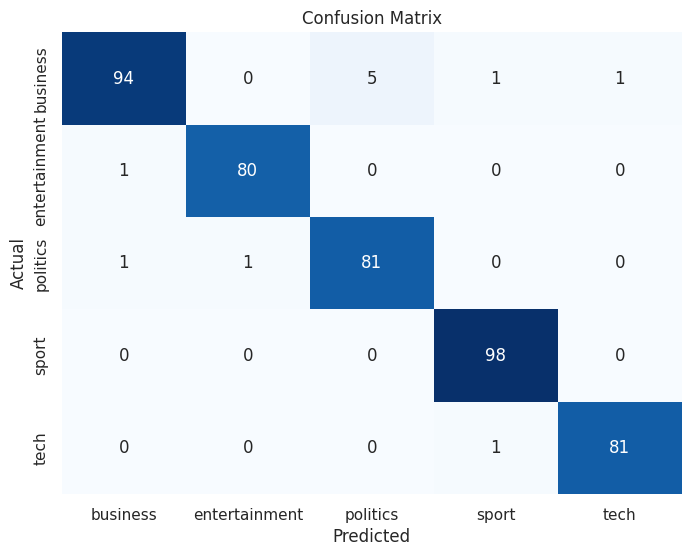

               precision    recall  f1-score   support

     business       0.98      0.93      0.95       101
entertainment       0.99      0.99      0.99        81
     politics       0.94      0.98      0.96        83
        sport       0.98      1.00      0.99        98
         tech       0.99      0.99      0.99        82

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
ROC-AUC: 1.00


In [16]:
# Importing Support Vector Classification (SVC) from scikit-learn
from sklearn.svm import SVC

# Creating an instance of SVC with a linear kernel
svc = SVC(kernel="linear", random_state=42, probability=True, C=3)

# Training the SVC model on the training data
svc.fit(X_train, y_train)

# Evaluating and displaying the performance of the SVC model
evaluate(svc)

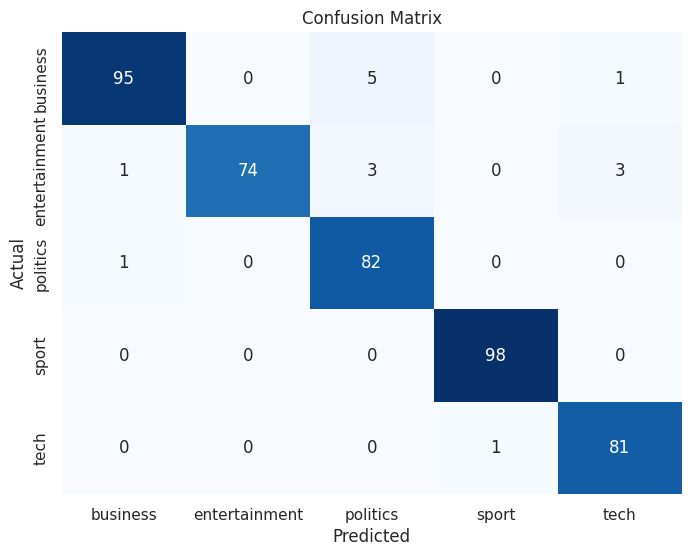

               precision    recall  f1-score   support

     business       0.98      0.94      0.96       101
entertainment       1.00      0.91      0.95        81
     politics       0.91      0.99      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.95      0.99      0.97        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
ROC-AUC: 1.00


In [17]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=0.2)

naive_bayes.fit(X_train, y_train)
evaluate(naive_bayes)

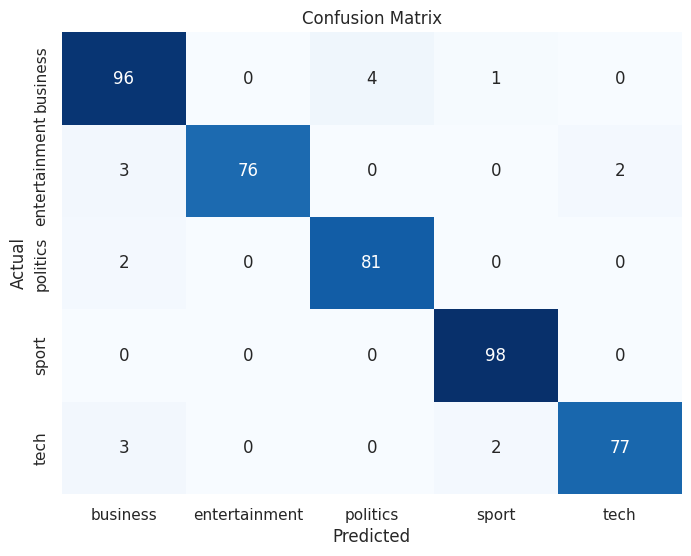

               precision    recall  f1-score   support

     business       0.92      0.95      0.94       101
entertainment       1.00      0.94      0.97        81
     politics       0.95      0.98      0.96        83
        sport       0.97      1.00      0.98        98
         tech       0.97      0.94      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
ROC-AUC: 1.00


In [18]:
# Importing LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating an instance of LogisticRegression
Logistic_Regression = LogisticRegression(random_state=42)

# Fitting the model to the training data
Logistic_Regression.fit(X_train, y_train)

# Evaluating and displaying the performance of the Logistic Regression model
evaluate(Logistic_Regression)

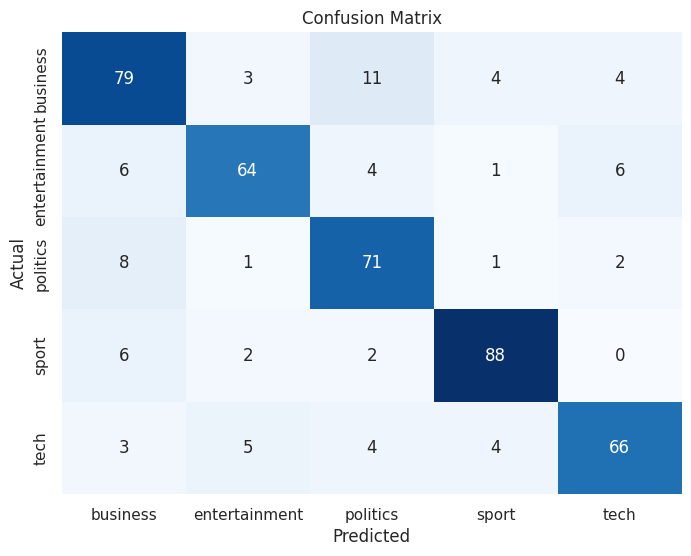

               precision    recall  f1-score   support

     business       0.77      0.78      0.78       101
entertainment       0.85      0.79      0.82        81
     politics       0.77      0.86      0.81        83
        sport       0.90      0.90      0.90        98
         tech       0.85      0.80      0.83        82

     accuracy                           0.83       445
    macro avg       0.83      0.83      0.83       445
 weighted avg       0.83      0.83      0.83       445

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-Score: 0.83
ROC-AUC: 0.89


In [19]:
# Importing DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Creating an instance of DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model on the training data
Decision_Tree.fit(X_train, y_train)

# Evaluating and displaying the performance of the Decision Tree model
evaluate(Decision_Tree)

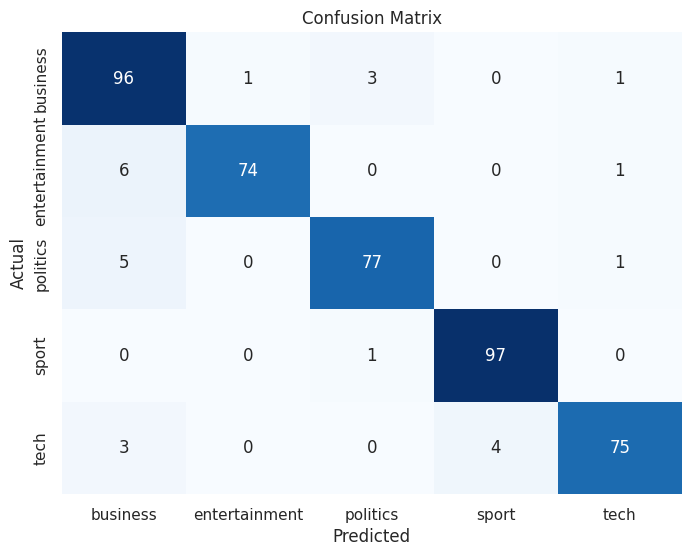

               precision    recall  f1-score   support

     business       0.87      0.95      0.91       101
entertainment       0.99      0.91      0.95        81
     politics       0.95      0.93      0.94        83
        sport       0.96      0.99      0.97        98
         tech       0.96      0.91      0.94        82

     accuracy                           0.94       445
    macro avg       0.95      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94
ROC-AUC: 1.00


In [20]:
# Importing RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of RandomForestClassifier
Random_Forest = RandomForestClassifier(
    n_estimators=200, random_state=42, criterion="entropy"
)

# Training the Random Forest classifier on the training data
Random_Forest.fit(X_train, y_train)

# Evaluating and displaying the performance of the Random Forest classifier
evaluate(Random_Forest)

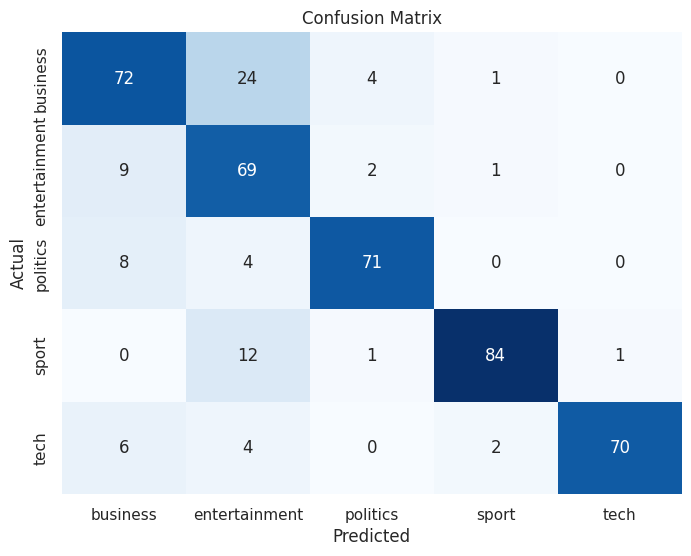

               precision    recall  f1-score   support

     business       0.76      0.71      0.73       101
entertainment       0.61      0.85      0.71        81
     politics       0.91      0.86      0.88        83
        sport       0.95      0.86      0.90        98
         tech       0.99      0.85      0.92        82

     accuracy                           0.82       445
    macro avg       0.84      0.83      0.83       445
 weighted avg       0.84      0.82      0.83       445

Accuracy: 0.82
Precision: 0.84
Recall: 0.82
F1-Score: 0.83
ROC-AUC: 0.93


In [21]:
# Importing AdaBoostClassifier from scikit-learn
from sklearn.ensemble import AdaBoostClassifier

# Creating an instance of AdaBoostClassifier
AdaBoost = AdaBoostClassifier(
    n_estimators=150,
    random_state=42,
)

# Training the AdaBoost classifier on the training data
AdaBoost.fit(X_train, y_train)

# Evaluating and displaying the performance of the AdaBoost classifier
evaluate(AdaBoost)

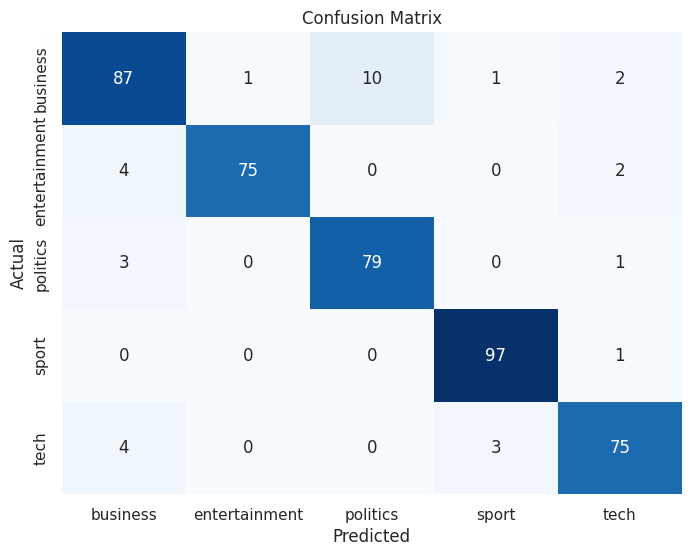

               precision    recall  f1-score   support

     business       0.89      0.86      0.87       101
entertainment       0.99      0.93      0.96        81
     politics       0.89      0.95      0.92        83
        sport       0.96      0.99      0.97        98
         tech       0.93      0.91      0.92        82

     accuracy                           0.93       445
    macro avg       0.93      0.93      0.93       445
 weighted avg       0.93      0.93      0.93       445

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
ROC-AUC: 0.99


In [22]:
# Importing XGBClassifier from xgboost
import xgboost as xgb

# Creating an instance of XGBClassifier
xgboost = xgb.XGBClassifier(
    objective="multiclass:softmax",
    n_estimators=75,
    random_state=42,
    max_depth=3,
    learning_rate=0.1,
    subsample=1,
)

# Training the XGBoost classifier on the training data
xgboost.fit(X_train, y_train)

# Evaluating and displaying the performance of the XGBoost classifier
evaluate(xgboost)

In [23]:
# List of classifiers
classifiers = [
    Logistic_Regression,
    svc,
    naive_bayes,
    Decision_Tree,
    Random_Forest,
    AdaBoost,
    xgboost,
]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through classifiers
for classifier in classifiers:
    # Calculate metrics for the current classifier
    metrics_result = evaluate(classifier, return_=True, conf_matrix=False)

    # Create a DataFrame from the dictionary
    metrics_df = pd.DataFrame([metrics_result])

    # Append the DataFrame to the list
    dfs.append(metrics_df)

# Concatenate DataFrames into a single DataFrame
results_df = pd.concat(dfs, ignore_index=True)

               precision    recall  f1-score   support

     business       0.92      0.95      0.94       101
entertainment       1.00      0.94      0.97        81
     politics       0.95      0.98      0.96        83
        sport       0.97      1.00      0.98        98
         tech       0.97      0.94      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
ROC-AUC: 1.00
               precision    recall  f1-score   support

     business       0.98      0.93      0.95       101
entertainment       0.99      0.99      0.99        81
     politics       0.94      0.98      0.96        83
        sport       0.98      1.00      0.99        98
         tech       0.99      0.99      0.99        82

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.

In [24]:
results_df

,Model,accuracy,precision,recall,f1,roc_auc
0,LogisticRegression,0.96,0.96,0.96,0.96,1.00
1,SVC,0.98,0.98,0.98,0.98,1.00
2,MultinomialNB,0.97,0.97,0.97,0.97,1.00
3,DecisionTreeClassifier,0.83,0.83,0.83,0.83,0.89
4,RandomForestClassifier,0.94,0.94,0.94,0.94,1.00
5,AdaBoostClassifier,0.82,0.84,0.82,0.83,0.93
6,XGBClassifier,0.93,0.93,0.93,0.93,0.99


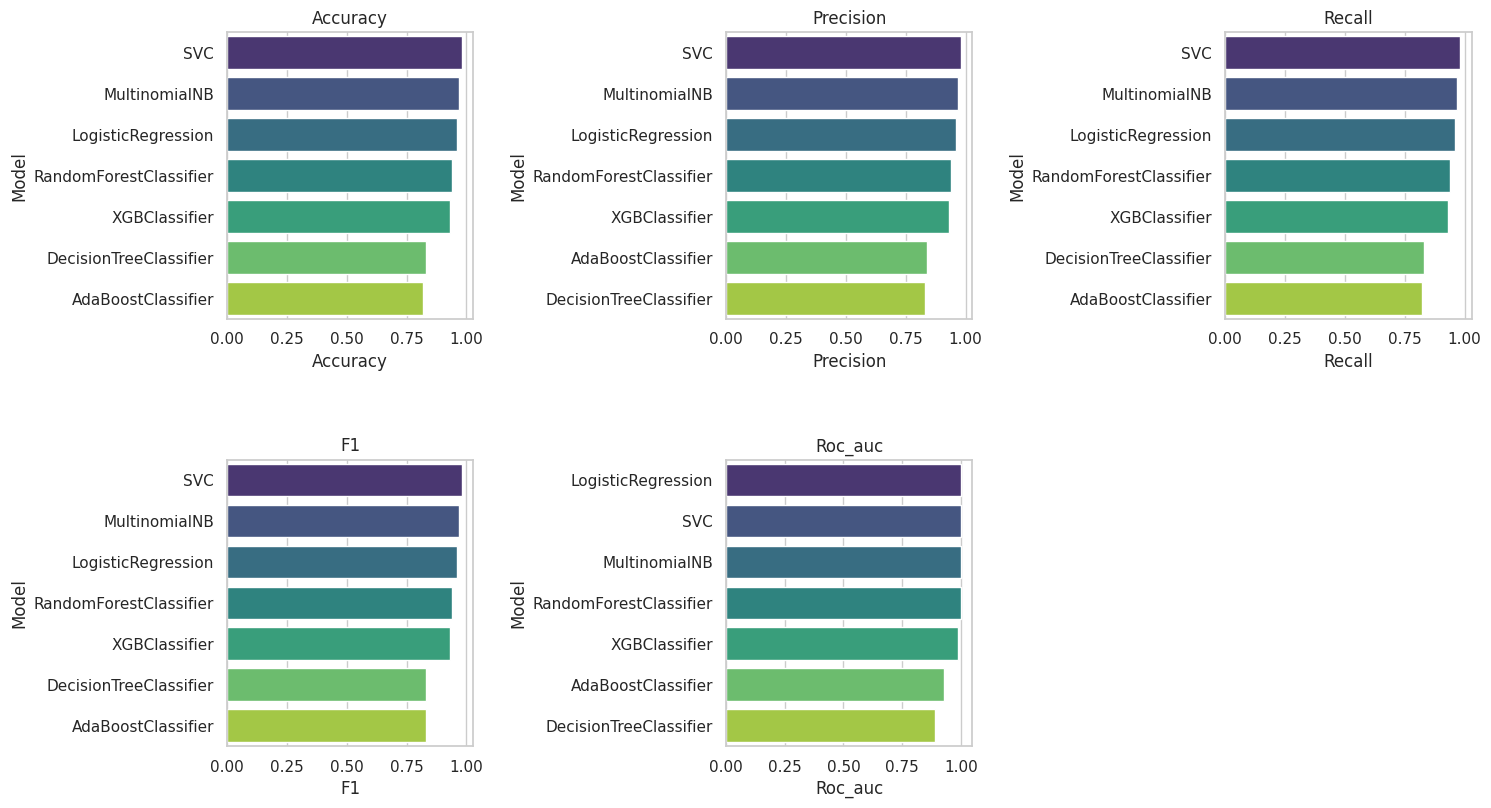

In [25]:
# Define the metrics to plot
metrics_to_plot = [
    "accuracy",
    "precision",
    "recall",
    "f1",
    "roc_auc"
]

# Plotting
plt.figure(figsize=(15, 12))

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics_to_plot, 1):
    # Sort the DataFrame for the current metric
    sorted_df = results_df.sort_values(by=metric, ascending=False)

    plt.subplot(3, 3, i)
    sns.barplot(x=metric, y="Model", data=sorted_df, palette="viridis")
    plt.title(metric.capitalize())
    plt.xlabel(metric.capitalize())
    plt.ylabel("Model")


# Adjust the layout for better visualization
plt.tight_layout(w_pad=2, h_pad=4)
plt.show()

In [26]:
import joblib

# Save the model
joblib.dump(svc, 'SVM_model.joblib')

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.joblib')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.joblib')

# Save the preprocess_text function (if it's a custom function)
with open('preprocess_text_function.pkl', 'wb') as file:
    joblib.dump(preprocess_text, file)


In [27]:
# Load the model
svc = joblib.load('SVM_model.joblib')

# Load the vectorizer
vectorizer = joblib.load('vectorizer.joblib')

# Load the label encoder
label_encoder = joblib.load('label_encoder.joblib')

# Load the preprocess_text function 
with open('preprocess_text_function.pkl', 'rb') as file:
    preprocess_text = joblib.load(file)


**Let's try our model with new data to assess its real-world performance.**

In [28]:
def predict(text):
    text = preprocess_text(text)
    text_transformed = vectorizer.transform([text])
    pred_classIndex = svc.predict(text_transformed)
    predicted_class = label_encoder.classes_[pred_classIndex][0]
    print(f"The given news belongs to the category : {predicted_class}")

In [29]:
sport_news = '''

Bruno Fernandes' stunning volley gave Manchester United a much-needed victory as they edged past winless Burnley in the Premier League.

United were in desperate search for inspiration following three straight defeats and received it on 45 minutes courtesy of captain Fernandes, who brilliantly volleyed home a first-time finish from Jonny Evans' lofted pass.

The sublime strike was worthy of winning any game and gave United their third win from six league games this season, leaving Vincent Kompany's side bottom of the table with only a point so far.

Burnley played some delightful football in periods and Zeki Amdouni gave the visitors a scare with a free header that was pushed away by Andre Onana at full stretch.

The Burnley frontman had an even better chance when he was played through by Aaron Ramsey, but a low shot cannoned off the foot of the post.

Evans thought he had given United the lead when he headed in a corner, but the effort was ruled out by the video assistant referee (VAR) for Rasmus Hojlund's block on goalkeeper James Trafford.

Burnley went hunting for an equaliser in the second period and Sander Berge narrowly headed over as United held on for victory.

Follow reaction Man Utd's win at Burnley
How did you rate Burnley's performance? Have your say here
What did you make of Manchester United's display? Send us your views here
Fernandes comes to the fore
United had shipped three or more goals in each of their three consecutive defeats against Arsenal, Brighton and Bayern Munich, and they badly required a positive result to get their faltering season back on track.

Marcus Rashford's effort into the side-netting after just 45 seconds may have given indications that this was a side rejuvenated, but it was another largely insipid and lethargic showing from the Red Devils.

Burnley grew into the game after Rashford's early opportunity and will be left wondering about the outcome had Amdouni converted either of the chances that fell his way in the first half.

Under-fire goalkeeper Onana did superbly to keep out a header from the Swiss striker, who also struck the woodwork after a fine team move.

The hosts were playing some eye-catching football but were undone by a moment of magic from Portuguese midfielder Fernandes on the stroke of half-time.

The skipper, who had tested Trafford earlier, peeled away from his marker before letting Evans' pinpoint pass drop into his path and unleashing an unstoppable volley into the bottom corner.

Fernandes could have netted a second even more spectacular strike in injury-time, but his effort on the hook was kept out by Trafford.

Defender Evans, who rejoined the club this summer, was making his first United start since March 2015 and had headed in, but the goal was chalked off by VAR.

The Northern Ireland international was part of the Leicester side that finished in the bottom three last season and Burnley will be looking to avoid the same fate this time.

They have lost all four home games so far this season and it took them nine matches for their first victory in 2021-22 - a campaign which ended in relegation to the Championship.

'''

predict(sport_news)

The given news belongs to the category : sport


In [30]:
entertainment_news = '''

BBC Sound of 2024: Tyla, Last Dinner Party and Kenya Grace tipped for success
The BBC's Sound of 2024 list, which tips music's most exciting new stars, suggests dance and Afrobeats will dominate the next 12 months.

The 10 nominees include chart-topping drum and bass artist Kenya Grace and South Korean house DJ Peggy Gou.

South Africa's Tyla also makes the cut, hot on the heels of her hit single Water; as does Nigeria's Ayra Starr.

Now in its 22nd year, the list has predicted success for Adele, Stormzy, Wet Leg, Fred Again and PinkPantheress.

The winner and top five will be announced in early January.

BBC Radio 1's Sound of 2024 longlist in full This year's longlist suggests African artists will continue to make headway in the UK, following the success of artists like Burna Boy, Asake, Rema, Tems, Wizkid and Tiwa Savage.

Tyla, who was born and raised in Johannesburg, is already making waves with her Grammy-nominated single Water, which is currently in both the UK and US top 10.

Sun-kissed and sensual, the song showcases her unique take on Amapiano, the popular South African genre that blends Afrobeats with deep house and kwaito music.

Ayra Starr began to receive mainstream recognition in 2022 for her song Rush, prompting Rolling Stone to call her "one of Nigeria's most promising new voices".

Singing in English, Pidgin and Yoruba, she has scored three number one singles in her home country and, after collaborations with WizKid and David Guetta, looks set to replicate that success worldwide.
Other artists on this year's longlist include art-rock five-piece The Last Dinner Party, whose debut single Nothing Matters has been streamed more than 13 million times on Spotify.

Building on their early word-of-mouth success, the group have toured this year with Florence + The Machine and Hozier, and were named one of BBC 6 Music's artists of the year.
They're the only band on the Sound of 2024 longlist, which is dominated by female solo acts, including Caity Baser, who describes her sound as "cheeky, British pop".

The Southampton-born singer already has a devoted fanbase, dubbed "Slaysers", and made headlines after capping her ticket prices at an inflation-busting £11.

Baser is joined by CMAT - dubbed "Ireland's answer to Dolly Parton" by the NME thanks to her whip-smart, emotionally-revealing country-pop songs.

There's also a strong showing for British soul and R&B, led by Oxford-born Stevie Wonder fanatic Elmiene.

The 22-year-old had a breakout moment in 2021, when his song Golden was chosen to soundtrack Virgil Abloh's final show for Louis Vuitton.

The show took place just two days after Abloh's tragic death, and Elmiene's mournful, nostalgic ballad seemed to be a tribute to the late fashion designer.

He has since released two EPs of equally emotional soul and collaborated with stars from Stormzy and Jamie Woon to Timbaland and Justin Timberlake.
Another artist referencing classic R&B records of the 1960s and 70s is Olivia Dean.

The London-born singer grew up listening to The Supremes and Aretha Franklin, and channelled those influences into her Mercury Prize-nominated debut album, Messy, earlier this year.

A graduate of the Brit School, she previously sang with Rudimental before striking out on her own.

Leicester-born Sekou first signed a record deal at the age of 16 after he was spotted performing in a car park.

Two years later, he has released a debut EP - Out of Mind - that showcases his rich, sonorous bass voice, and earned himself a nomination for the Brits Rising Star Award (alongside Caity Baser and The Last Dinner Party).

Finally, dance music continues its post-pandemic renaissance, with some assistance from Kenya Grace, the South African-born British singer who scored a number one hit with a song she started in her bedroom.

That track was Strangers - a sinuous drum and bass anthem about disposable dating. Her follow-up single, Paris, has just been "tune of the weekend" on Radio 1.

Korean-born, Berlin-based DJ Peggy Gou completes the 2024 longlist, seven years after releasing her debut single, Day Without Yesterday.

A regular crowd-puller at festivals like Glastonbury and Coachella, she crossed into the mainstream this summer with the feelgood anthem (It Goes Like) Nanana. Her latest single, I Believe In Love Again, is a collaboration with rock legend Lenny Kravitz.
The Sound of 2024 was voted for by more than 140 music industry experts, including representatives from Spotify, Apple Music, Glastonbury Festival, the BBC and former nominees including Jorja Smith, PinkPantheress and Tom Grennan.

To qualify, artists must not have had a UK number one or number two album, or more than two top 10 singles by 12 October 2023.

Singers who have appeared on TV talent shows within the last three years are also ineligible.

The winner will be revealed in the new year on BBC Radio 1, with the top five revealed in reverse order between Monday 1 and Friday 5 January.

Last year's prize was won by girl band Flo, with superstar dance producer Fred Again in second place and drum & bass revivalist Nia Archives placing third.

'''

predict(entertainment_news)

The given news belongs to the category : entertainment


In [31]:
politics_news = '''
'Labour won't turn on spending taps' says Starmer
Sir Keir Starmer is to warn that the UK will face "huge constraints" on public spending if his party win the next General Election.

On Monday, he will say anyone expecting an incoming Labour government "to quickly turn on the spending taps is going to be disappointed".

Growing the economy is set to be a battleground for both Labour and the Conservatives at the next election.

The Conservatives claim Labour's borrowing plan would raise taxes.

Rishi Sunak, the prime minister, has made economic growth one of his key pledges.

The cost of living in the UK has put the economy at the centre of political debate as inflation and high interest rates put pressure on household budgets.

The UK has not slipped into recession but there have been concerns over weak growth.

The Bank of England's governor, Andrew Bailey, said last week that productivity rates in the UK "concern me a lot".

In a speech to economists and think-tanks later on Monday, Sir Keir will say economic growth "will have to become Labour's obsession if we are to turn around the economy".

But he will argue that decisions taken from the government and previous Conservative administrations for the past 13 years "will constrain what a future Labour government can do".

"The comparison between 2010 and today is instructive," the Labour leader will say.

"Now, debt and interest rates are much higher. Britain's standing is diminished. Growth is stagnant and public services are on their knees."

"Taxes are higher than at any time since the war, none of which was true in 2010. Never before has a British government asked its people to pay so much, for so little."

His comments will come after his party denied claims it could further water down its flagship green prosperity plan.

A senior source had suggested to the BBC that the level of investment previously promised - of £28bn a year - might never be reached.

In June Rachel Reeves, the shadow chancellor, watered the pledge down. Senior source in the Labour leader's office said the decision was made because of the state of the public finances.

However, a Conservative spokesman said Labour's policy "presents a major risk" to the British economy at a time when the cost of borrowing is "so high".

Richard Holden, the Conservative party chairman, said: "The largest 'constraint' to growing the economy would be Labour's £28bn a year borrowing plan - which independent economists warn would see inflation, interest rates and people's taxes rise".

Labour denies abandoning £28bn green pledge
As well as focusing on growth, Sir Keir will outline his plans which include changing "restrictive planning laws and get Britain building again" and creating a "proper industrial strategy drawn up with business".

He will also declare Labour would secure "a new deal to make work pay with increased mental health support, fully-funded plan to cut NHS waiting lists, an end to zero hour contracts, no more fire and rehire, and a real living wage".

The government has announce it will increase the minimum wage by more than a pound to £11.44 next April, but the government's forecaster, the Office for Budget Responsibility (OBR), has said living standards are also not expected to return to pre-pandemic levels until 2027-28.

Sir Keir will say that the current parliament is "on track to be the first in modern history where living standards in this country have actually contracted".

Most recent official figures show the economy failed to grow between July and September, after a succession of interest rate rises that have increased borrowing costs.

Chancellor Jeremy Hunt announced several tax cuts in his autumn statement.

One policy move included making permanent a tax break which allows businesses to deduct the full cost of investing in machinery and equipment from their tax bill.

But the decisions will not prevent taxes staying at their highest level on record and economic growth is forecast to be sluggish.

Sir Keir will also say in his speech that "it's not the case that 'any growth' will do".

"No, we can't be agnostic about the sort of growth we pursue, anymore. The growth we need must better serve working people. And must raise living standards in every community," he will argue.


'''

predict(politics_news)

The given news belongs to the category : politics


In [32]:
business_news = '''

Bankruptcy 'opportunity' after student loan crisis

Drowning in debt, more and more Americans are taking advantage of a Biden-era change that has made it easier to have student loans forgiven - if they're willing to apply for bankruptcy.

Elizabeth Hadzic, a divorced mum-of-three, has ideas about what she would do if she weren't facing a mountain of student debt: open her own therapy practice, return to her native Canada, work remotely and spend a month with her grandchild.

A change to the US bankruptcy process could make it all possible.

Last year, the US said it would make it easier for people to free themselves of student loans in bankruptcy, a prospect long considered hopeless.

It is a move with potentially vast implications in a country where more than 43 million people carry student debt, generating a total debt load of more than $1.7tn (£1.34tn), and borrowers often face heavy monthly bills decades after they have finished their education.

Bankruptcy, said Ms Hadzic, "opens up opportunity that I couldn't really see before."

This summer she asked the government to erase more than $100,000 in debt from student loans she took on to train as a therapist. She faces potential monthly bills of more than $1,400 - a sum she said she cannot afford alongside the rest of her expenses.

"I thought I'd be able to pay it off... but what I do for work just doesn't make that volume of money," said the 50-year-old, who worked for community health, prison and homeless programmes before switching to a private company in 2019 to try to earn more.

"In my mind, I kept thinking I'm going to pay this money back until I realized it just wasn't going to happen... I would be paying this the rest of my life."

For decades, student loans in the US have faced a higher bar for forgiveness than other debts, like credit-cards, with borrowers forced to prove "undue hardship" if forced to repay - a term that has led to contentious court battles.

The rules were created to prevent borrowers from taking on big loans with no intention of repaying - and limit the potentially huge cost to the federal government, which is the largest provider of student loans in the US.

But critics say it has led to a system that is unduly harsh, generating horror stories of the government fighting bankrupt single mothers and cancer patients for thousands of dollars in monthly debts they are unable to pay.

Unlike the UK and other parts of the world, monthly student loan payments often bear no relation to a borrower's income; nor do they come with an expiration date.

President Joe Biden, whose most ambitious debt forgiveness plan was blocked by the courts this year, backed changes to the bankruptcy system during his 2020 presidential campaign.
Guidance from the Department of Justice announced last year instructed officials to avoid litigation and agree to discharge the loans if a borrower faces higher expenses than income; is unlikely to be able to pay the loan in the future; and has made an effort to pay.

An estimated 250,000 people with student loans file for bankruptcy in the US each year, and under the new guidelines, about 100,000 could be eligible for some student debt relief, according to estimates by Jason Iuliano, a law professor at the University of Utah.

But so far, only a small number - about 630 - have actually petitioned to discharge their student loans as part of their personal bankruptcy.

The Department of Justice would not say how many of those claims had been resolved, but said some relief had been granted in 99% of those that had. Advocates said that number stood at just a few dozen as of July.

With many lawyers still learning about the changes, John Rao, senior attorney at the National Consumer Law Center, said the programme needed more time to prove itself.

But even if the numbers remain small compared to the problem, he said the impact should not be underestimated.

"There are real stories and people behind those numbers," he said. "While it may only be a couple thousand who might use this, for them, it's changed their lives."

Kestrel O'Conally of Washington filed for relief this spring, hoping for a discharge of more than $600,000 in student debt, including nearly $175,000 in interest, racked up in pursuit of a doctorate in psychology.

With little other debt, the 41-year-old said she had never considered bankruptcy before a friend alerted her to a news article describing the changes.
In her situation, as a renter with few assets, the consequences from bankruptcy, like having credit cards cancelled, seemed like small prices to pay, she said.

"It was a no brainer," she said. "I get my life back."

Those who have pursued relief via bankruptcy typically face months of wait. Aaron Ament, president of the National Student Legal Defense Network, warned those delays could worsen if the idea gains traction.

Petitions in the first 10 months since the change were already about 30% more than the average pre-pandemic year.

Those numbers are expected to accelerate, as borrowers have to resume student loan payments after a three-year pandemic-related pause ended in October.

"It's getting real now in terms of coming up with the money to pay the loans out of their existing budget," said Latife Neu, a student loan and bankruptcy lawyer in Washington state, who said she had seen a steady uptick in inquiries.

Ms Hadzic said her bankruptcy was not technically triggered by her student loans, but by thousands of dollars in credit card debt racked up when her youngest son landed in hospital and she had to take off work.

But her lawyer, Timothy Chambers, said without addressing the student loans as well, he feared she could land in a similar financial crisis.

"I'm hoping this will be able to give people like Elizabeth that absolute fresh start which bankruptcy is supposed to give," he said.

'''

predict(business_news)

The given news belongs to the category : business


In [33]:
tech_news = '''

Meta takes down China-based network of thousands of fake accounts

Meta says it recently removed a network of thousands of fake and misleading accounts based in China.

The users posed as Americans and sought to spread polarising content about US politics and US-China relations.

Among the topics the network posted about were abortion, culture war issues and aid to Ukraine.

Meta did not link the profiles to Beijing officials, but it has seen an increase in such networks based in China ahead of the 2024 US elections.

China is now the third-biggest geographical source of such networks, the company said, behind Russia and Iran.

The recent takedowns were outlined in a quarterly threat report released on Thursday by the parent company of Facebook, Instagram and WhatsApp.

The China-based network included more than 4,700 accounts and used profile pictures and names copied from other users around the world.

The accounts shared and liked each other's posts, and some of the content appeared to be taken directly from X, formerly Twitter.

In some cases the accounts copied and pasted verbatim posts from US politicians - both Republicans and Democrats - including former House Speaker Nancy Pelosi, Michigan Governor Gretchen Whitmer, Florida Governor Ron DeSantis, Reps Matt Gaetz and Jim Jordan, and others.

The network displayed no ideological consistency.

In examples released by Meta, an account in the China-based network reposted the words contained in a tweet earlier this year by Democrat Congresswoman Sylvia Garcia. She criticised Texas's abortion laws and wrote: "Let's remember - abortion is healthcare."

But another account in the network copied-and-pasted a tweet from Republican Representative Ronny Jackson, who wrote: "Taxpayer dollars should NEVER fund travel for abortions."

Meta's report stated: "It's unclear whether this approach was designed to amplify partisan tensions, build audiences among these politicians' supporters, or to make fake accounts sharing authentic content appear more genuine."

The company's moderation rules forbid what Meta calls "co-ordinated inauthentic behaviour" - posts by groups of accounts that work together and use false identities to mislead other users.

Often the content shared by such networks is not false and references accurate news stories from major media outlets. But instead of being used for legitimate comment or debate, the posts are meant to manipulate public opinion, push division and make particular viewpoints seem more popular than they really are.

Meta said the large Chinese network was stopped before it took off among real users.

Ben Nimmo, who leads investigations into inauthentic behaviour on the company's platforms, said such networks "still struggle to build audiences, but they're a warning".

"Foreign threat actors are attempting to reach people across the internet ahead of next year's elections, and we need to remain alert."

The company said it also discovered two smaller networks, one based in China and focusing on India and Tibet, and one based in Russia which posted primarily in English about the invasion of Ukraine and promoted Telegram channels.

Russian networks, which prompted the company to focus on inauthentic campaigns following the 2016 election, have increasingly focused on the war in Ukraine and have attempted to undermine international support for Kyiv, the report said.

Meta also noted that the US government stopped sharing information about foreign influence networks with the company in July, after a federal ruling as part of a legal case over the First Amendment that is now under consideration by the Supreme Court.

The case is part of a larger debate about over whether the US government works with tech companies to unduly restrict the free speech of social media users.

'''

predict(tech_news)

The given news belongs to the category : tech


# 🎉 News Classification Success! 🎉

**Exciting Results!** 👏🏆📰

**I retrieved news articles from different sections of BBC News, including 'Business,' 'Entertainment,' 'Politics,' 'Sport,' and 'Tech.' Our model showcased its accuracy by correctly predicting the category for each news article. This underscores the robust performance of our model in accurately classifying diverse news topics. Bravo!**




# Model Deployment on Hugging Face

I'm excited to share that the trained news article classification model is now deployed and accessible on Hugging Face Spaces. You can interact with the model and test its capabilities using the provided link below:

[News Categorizer on Hugging Face](https://huggingface.co/spaces/moazx/News_Categorizer?logs=container)

## How to Use

1. Click on the link to access the model on the Hugging Face Spaces platform.
2. You can input text samples or news articles to the provided interface.
3. The model will categorize the input into relevant news categories based on its training.

Feel free to explore and test the model's performance. If you have any feedback or questions, please don't hesitate to reach out.

